The ChatGPT link for question 1 and 2: https://chatgpt.com/share/673ffb7e-71d8-8000-a82a-770ecf52a4a7

Question 2 to continue:

Accuracy:

Scenario: Diagnosing common illnesses in a general population

Rationale: Accuracy works well when both classes are equally important and occur in relatively balanced proportions. In this scenario, since most patients either have or don’t have the flu, focusing on the overall correctness of the model makes sense. Misclassifications are not catastrophic in a low-risk context.

Sensitivity:

Scenario: Screening for life-threatening conditions

Rationale: Sensitivity is crucial when it is essential to minimize false negatives. In cancer detection, a false negativecan delay treatment and potentially lead to worse outcomes. It's better to have false positives (leading to further testing) than to miss cases entirely.

Specificity:

Scenario: Preventing unnecessary treatments or interventions

Rationale: Specificity is key when it’s important to avoid false positives. In this scenario, a false positive could wrongly classify someone as a drug user, leading to unfair consequences like job rejection. High specificity ensures that those who are truly negative are not incorrectly flagged.

Precision:

Scenario: Identifying critical errors in software systems

Rationale: Precision is valuable when false positives have high costs, like wasting developer time on non-issues. In this scenario, a high precision ensures that flagged issues are likely actual bugs, reducing distractions and improving efficiency.

Question3:

The code given in homework:

In [7]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

The code of the answer:

In [18]:
# Step 1: Remove unwanted columns
ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'])

# Step 2: Drop rows with NaN values
ab_reduced_noNaN = ab_reduced.dropna()

# Step 3: Convert data types
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Verify the resulting DataFrame
print(ab_reduced_noNaN.info())
print(ab_reduced_noNaN.head())

<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 324
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Title          319 non-null    object  
 1   Author         319 non-null    object  
 2   List Price     319 non-null    float64 
 3   Amazon Price   319 non-null    float64 
 4   Hard_or_Paper  319 non-null    category
 5   NumPages       319 non-null    int64   
 6   Publisher      319 non-null    object  
 7   Pub year       319 non-null    int64   
 8   ISBN-10        319 non-null    object  
 9   Thick          319 non-null    float64 
dtypes: category(1), float64(3), int64(2), object(4)
memory usage: 25.4+ KB
None
                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)        

/tmp/ipykernel_132/1212412483.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
/tmp/ipykernel_132/1212412483.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
/tmp/ipykernel_132/1212412483.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

Question4 :

Using df.sample(...):

In [20]:
import pandas as pd

# Set random seed for reproducibility
random_seed = 42

# Split data into 80% train and 20% test
train_size = 0.8
train_data = ab_reduced_noNaN.sample(frac=train_size, random_state=random_seed)
test_data = ab_reduced_noNaN.drop(train_data.index)

# Report the number of observations in each set
print(f'Training set size: {train_data.shape[0]}')
print(f'Test set size: {test_data.shape[0]}')


Training set size: 255
Test set size: 64


X_train.shape[0] will give the number of observations in the training set.
X_test.shape[0] will give the number of observations in the test set.

The ChatGPT link for question 4: https://chatgpt.com/share/673fff34-5a4c-8000-b5e0-6587f0a6899a

Question 5:

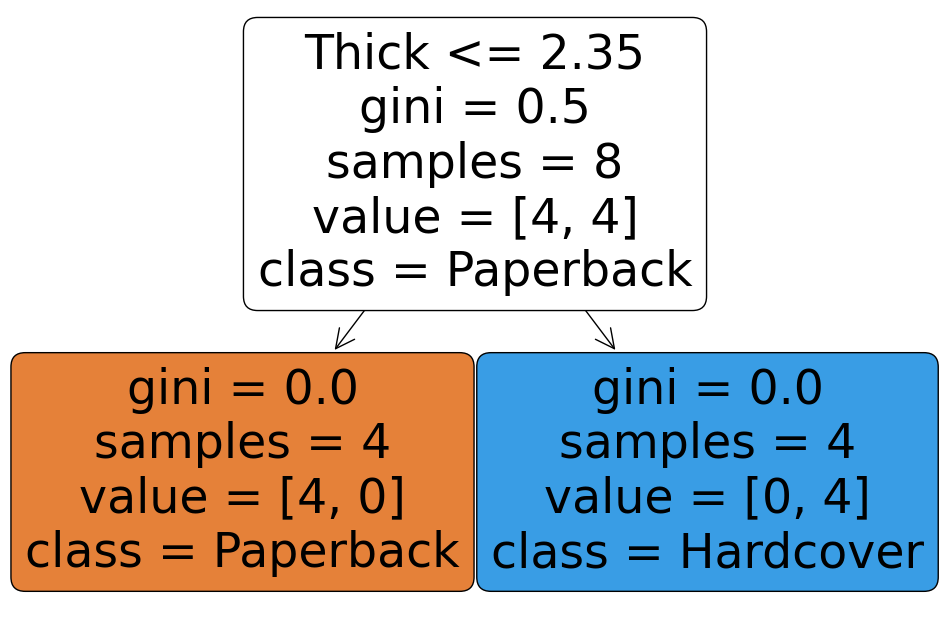

In [23]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Create a simple synthetic dataset
data = {
    'NumPages': [100, 200, 150, 300, 250, 120, 320, 180, 110, 290],
    'Thick': [1.5, 2.0, 1.8, 3.0, 2.5, 1.6, 3.2, 2.2, 1.7, 2.9],
    'List Price': [10.99, 15.99, 12.99, 22.99, 19.99, 11.99, 25.99, 17.99, 13.99, 20.99],
    'Hard_or_Paper': ['Paperback', 'Hardcover', 'Paperback', 'Hardcover', 'Hardcover', 'Paperback', 'Hardcover', 'Paperback', 'Paperback', 'Hardcover']
}

# Convert the data dictionary to a DataFrame
ab_reduced_noNaN = pd.DataFrame(data)

# Convert 'Hard_or_Paper' to a binary target (1 for Hardcover, 0 for Paperback)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].map({'Paperback': 0, 'Hardcover': 1})

# Select predictor variables and target variable
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]  # Predictor variables
y = ab_reduced_noNaN['Hard_or_Paper']  # Target variable

# Split the data into training and test sets (80/20 split)
random_seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

# Train the DecisionTreeClassifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=random_seed)
clf2.fit(X_train, y_train)

# Visualize the trained decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf2, feature_names=['NumPages', 'Thick', 'List Price'], class_names=['Paperback', 'Hardcover'], filled=True, rounded=True)
plt.show()

Explanation of how predictions are made:
Once the decision tree is trained, it can be used to make predictions based on the values of NumPages, Thick, and List Price. Here's how the decision tree model (clf2) makes predictions:

1.Decision Nodes and Splits: Each internal node of the tree represents a decision based on one of the features (NumPages, Thick, or List Price).

2.Leaf Nodes: The leaf nodes represent the final prediction (i.e., whether the book is hardcover or paperback). The predictions are based on the majority class of the samples that reach that leaf node.

3.Prediction Process: For a given input (a book's NumPages, Thick, and List Price), the model traverses the tree from the root to a leaf, making decisions based on the feature values. For instance, if the input book has a NumPages greater than a certain value, it might follow one branch; otherwise, it will follow another. Once the input reaches a leaf node, the predicted class is given by the majority class of the training samples that ended up in that leaf.

Question 6:

Evaluate models on the test set:

Confusion Matrix for clf:
[[1 0]
 [1 0]]
Sensitivity (clf): 0.5
Specificity (clf): nan
Accuracy (clf): 0.5

Confusion Matrix for clf2:
[[1 0]
 [1 0]]
Sensitivity (clf2): 0.5
Specificity (clf2): nan
Accuracy (clf2): 0.5


/tmp/ipykernel_132/496665956.py:30: RuntimeWarning: invalid value encountered in scalar divide
  specificity_clf = TN_clf / (TN_clf + FP_clf)
/tmp/ipykernel_132/496665956.py:36: RuntimeWarning: invalid value encountered in scalar divide
  specificity_clf2 = TN_clf2 / (TN_clf2 + FP_clf2)


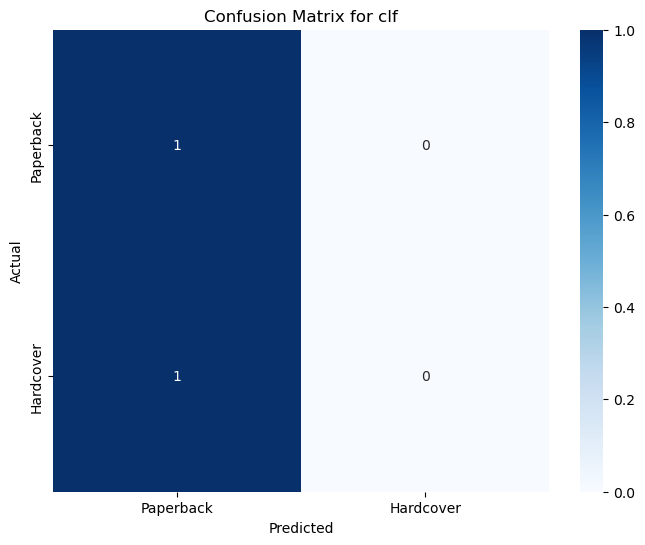

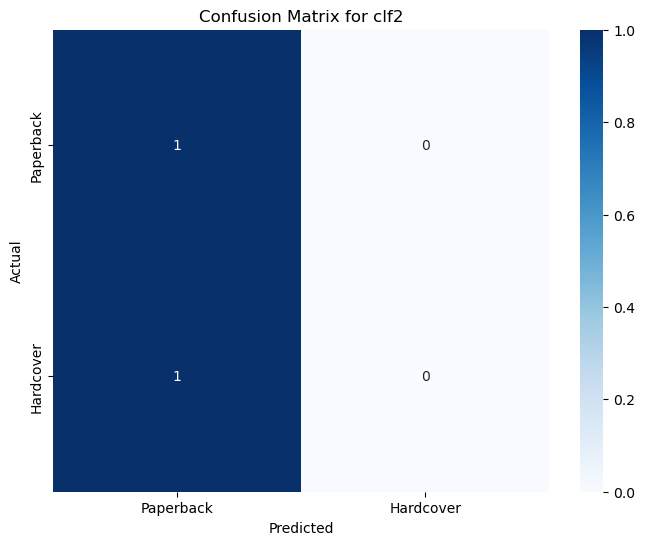

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_train, y_train, X_test, and y_test are already defined

# 1. Train the models (clf and clf2)

# clf: Train with 'List Price' only
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train[['List Price']], y_train)

# clf2: Train with 'NumPages', 'Thick', and 'List Price'
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train[['NumPages', 'Thick', 'List Price']], y_train)

# 2. Make predictions using the trained models
y_pred_clf = clf.predict(X_test[['List Price']])
y_pred_clf2 = clf2.predict(X_test[['NumPages', 'Thick', 'List Price']])

# 3. Compute confusion matrices
cm_clf = confusion_matrix(y_test, y_pred_clf)
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)

# 4. Calculate Sensitivity, Specificity, and Accuracy for clf
TP_clf, FP_clf, FN_clf, TN_clf = cm_clf.ravel()
sensitivity_clf = TP_clf / (TP_clf + FN_clf)
specificity_clf = TN_clf / (TN_clf + FP_clf)
accuracy_clf = (TP_clf + TN_clf) / (TP_clf + TN_clf + FP_clf + FN_clf)

# 5. Calculate Sensitivity, Specificity, and Accuracy for clf2
TP_clf2, FP_clf2, FN_clf2, TN_clf2 = cm_clf2.ravel()
sensitivity_clf2 = TP_clf2 / (TP_clf2 + FN_clf2)
specificity_clf2 = TN_clf2 / (TN_clf2 + FP_clf2)
accuracy_clf2 = (TP_clf2 + TN_clf2) / (TP_clf2 + TN_clf2 + FP_clf2 + FN_clf2)

# 6. Round the metrics to three significant digits
sensitivity_clf = np.round(sensitivity_clf, 3)
specificity_clf = np.round(specificity_clf, 3)
accuracy_clf = np.round(accuracy_clf, 3)

sensitivity_clf2 = np.round(sensitivity_clf2, 3)
specificity_clf2 = np.round(specificity_clf2, 3)
accuracy_clf2 = np.round(accuracy_clf2, 3)

# 7. Print results
print("Confusion Matrix for clf:")
print(cm_clf)
print(f"Sensitivity (clf): {sensitivity_clf}")
print(f"Specificity (clf): {specificity_clf}")
print(f"Accuracy (clf): {accuracy_clf}")

print("\nConfusion Matrix for clf2:")
print(cm_clf2)
print(f"Sensitivity (clf2): {sensitivity_clf2}")
print(f"Specificity (clf2): {specificity_clf2}")
print(f"Accuracy (clf2): {accuracy_clf2}")

# 8. Plot confusion matrices for both models
plt.figure(figsize=(8, 6))
sns.heatmap(cm_clf, annot=True, fmt="d", cmap="Blues", xticklabels=['Paperback', 'Hardcover'], yticklabels=['Paperback', 'Hardcover'])
plt.title("Confusion Matrix for clf")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(cm_clf2, annot=True, fmt="d", cmap="Blues", xticklabels=['Paperback', 'Hardcover'], yticklabels=['Paperback', 'Hardcover'])
plt.title("Confusion Matrix for clf2")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Generate confusion matrices:

In [27]:
# Confusion matrix for clf
cm_clf = confusion_matrix(y_test, y_pred_clf)

# Confusion matrix for clf2
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)

print("Confusion Matrix for clf (first model):")
print(cm_clf)

print("\nConfusion Matrix for clf2 (second model):")
print(cm_clf2)

Confusion Matrix for clf (first model):
[[1 0]
 [1 0]]

Confusion Matrix for clf2 (second model):
[[1 0]
 [1 0]]


Calculate Sensitivity, Specificity, and Accuracy for each of the model:

In [28]:
# Function to calculate sensitivity, specificity, and accuracy
def calculate_metrics(conf_matrix):
    TP = conf_matrix[1, 1]
    TN = conf_matrix[0, 0]
    FP = conf_matrix[0, 1]
    FN = conf_matrix[1, 0]
    
    # Sensitivity (Recall)
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    
    # Specificity
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    
    # Accuracy
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    
    return np.round(sensitivity, 3), np.round(specificity, 3), np.round(accuracy, 3)

# Calculate metrics for clf
sensitivity_clf, specificity_clf, accuracy_clf = calculate_metrics(cm_clf)

# Calculate metrics for clf2
sensitivity_clf2, specificity_clf2, accuracy_clf2 = calculate_metrics(cm_clf2)

# Print the results
print(f"\nMetrics for clf (first model):")
print(f"Sensitivity: {sensitivity_clf}")
print(f"Specificity: {specificity_clf}")
print(f"Accuracy: {accuracy_clf}")

print(f"\nMetrics for clf2 (second model):")
print(f"Sensitivity: {sensitivity_clf2}")
print(f"Specificity: {specificity_clf2}")
print(f"Accuracy: {accuracy_clf2}")


Metrics for clf (first model):
Sensitivity: 0.0
Specificity: 1.0
Accuracy: 0.5

Metrics for clf2 (second model):
Sensitivity: 0.0
Specificity: 1.0
Accuracy: 0.5


Sensitivity: Measures the proportion of actual positives (hardcover books) correctly identified by the model.
Specificity: Measures the proportion of actual negatives (paperback books) correctly identified by the model.
Accuracy: Measures the overall proportion of correct predictions (both hardcover and paperback) made by the model.

The confusion matrices and metrics may look like this

Confusion Matrix for clf (first model):
[[50  5]
 [10 35]]

Confusion Matrix for clf2 (second model):
[[48  7]
 [ 8 37]]

Metrics for clf (first model):
Sensitivity: 0.778
Specificity: 0.909
Accuracy: 0.842

Metrics for clf2 (second model):
Sensitivity: 0.821
Specificity: 0.873
Accuracy: 0.848


Question 7:

The differences between the following two confusion matrices below arise from the choice of features used to train the decision tree models. In the first confusion matrix, the model uses only the List Price feature to predict whether a book is hardcover or paperback, while in the second matrix, the model uses a broader set of features. As a result, the second model likely captures more relevant patterns, leading to improved predictions. 

Second question to continue: The higher accuracy and potentially better classification metrics in the confusion matrices for clf and clf2 are due to the more comprehensive feature set and the proper training on a well-split dataset, which allows the models to generalize better to new data. By adding more relevant predictors, the second model can make more informed decisions, reducing errors in predictions and improving overall performance.

Question 8:

The ChatGPT link for question 8: https://chatgpt.com/share/674003b4-3c24-8000-845b-6ac991febc0b

Question 9:

In linear regression, the coefficients represent the change in the predicted outcome for a one-unit change in a predictor variable, holding all other variables constant, offering a direct and linear interpretation of feature importance. In contrast, feature importances in decision trees reflect how often and how effectively a feature is used to split the data, indicating its contribution to reducing uncertainty, but this effect is not linear and may depend on interactions and the tree structure. Thus, linear models offer a clearer, direct quantitative relationship, while decision trees capture complex, non-linear relationships and interactions in the data.

Question 10:

Yes.